In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data_latih_opsi_1.csv", names = ["Suhu", "Waktu", "Cuaca", "Hujan", "Hasil"])
df.head()

,Suhu,Waktu,Cuaca,Hujan,Hasil
0,normal,siang,berawan,normal,tidak
1,normal,siang,cerah,normal,tidak
2,normal,pagi,hujan,normal,tidak
3,normal,sore,rintik,rendah,ya
4,normal,malam,berawan,tinggi,tidak


In [3]:
def encode(d) :

    datas = []
    for i in df.index :
        temp = []
        if (df.Suhu[i] == "rendah") :
            temp.append(1)
            temp.append(0)
            temp.append(0)
        if (df.Suhu[i] == "normal") :
            temp.append(0)
            temp.append(1)
            temp.append(0)
        if (df.Suhu[i] == "tinggi") :
            temp.append(0)
            temp.append(0)
            temp.append(1)
        if (df.Waktu[i] == "pagi") :
            temp.append(1)
            temp.append(0)
            temp.append(0)
            temp.append(0)
        if (df.Waktu[i] == "siang") :
            temp.append(0)
            temp.append(1)
            temp.append(0)
            temp.append(0)
        if (df.Waktu[i] == "sore") :
            temp.append(0)
            temp.append(0)
            temp.append(1)
            temp.append(0)
        if (df.Waktu[i] == "malam") :
            temp.append(0)
            temp.append(0)
            temp.append(0)
            temp.append(1)
        if (df.Cuaca[i] == "cerah") :
            temp.append(1)
            temp.append(0)
            temp.append(0)
            temp.append(0)
        if (df.Cuaca[i] == "berawan") :
            temp.append(0)
            temp.append(1)
            temp.append(0)
            temp.append(0)
        if (df.Cuaca[i] == "rintik") :
            temp.append(0)
            temp.append(0)
            temp.append(1)
            temp.append(0)
        if (df.Cuaca[i] == "hujan") :
            temp.append(0)
            temp.append(0)
            temp.append(0)
            temp.append(1)
        if (df.Hujan[i] == "rendah") :
            temp.append(1)
            temp.append(0)
            temp.append(0)
        if (df.Hujan[i] == "normal") :
            temp.append(0)
            temp.append(1)
            temp.append(0)
        if (df.Hujan[i] == "tinggi") :
            temp.append(0)
            temp.append(0)
            temp.append(1)
        if (df.Hasil[i] == "tidak") :
            temp.append(0)
        if (df.Hasil[i] == "ya") :
            temp.append(1)
        datas.append(temp)
    return datas

In [4]:
def generate_populasi(ukpop, gen) :
  populasi = []
  for i in range (ukpop) :
    populasi.append(np.random.randint(2, size=gen))

  return populasi

In [5]:
def fitness(populasi, data_train) :
    arr_fitness = []
    indv_data = np.copy(data_train)
    for i in range(len(populasi)) :
        accuracy = 0
        indv_ga = np.copy(populasi[i])
        acc = 0
        for j in range(len(indv_data)) :
            indv_data_train = np.copy(indv_data[j]) 
            suhu = False
            waktu = False
            cuaca = False
            hujan = False
            has = False
            rule1 = False
            klas = False

            suhu = ((indv_ga[0] and indv_data_train[0]) or (indv_ga[1] and indv_data_train[1]) or (indv_ga[2] and indv_data_train[2]))
            waktu = ((indv_ga[3] and indv_data_train[3]) or (indv_ga[4] and indv_data_train[4]) or (indv_ga[5] and indv_data_train[5]) or (indv_ga[6] and indv_data_train[6]))
            cuaca = ((indv_ga[7] and indv_data_train[7]) or (indv_ga[8] and indv_data_train[8]) or (indv_ga[9] and indv_data_train[9]) or (indv_ga[10] and indv_data_train[10]))
            hujan = ((indv_ga[10] and indv_data_train[10]) or (indv_ga[12] and indv_data_train[12]) or (indv_ga[13] and indv_data_train[13]))
            klas = (indv_ga[14] == indv_data_train[14])
            has = suhu and waktu and cuaca and hujan and klas
            
            suhu2 = False
            waktu2 = False
            cuaca2 = False
            hujan2 = False
            has2 = False
            hasil2 = False
            rule2 = False
            klas2 = False
            
            suhu2 = ((indv_ga[15] and indv_data_train[0]) or (indv_ga[16] and indv_data_train[1]) or (indv_ga[17] and indv_data_train[2]))
            waktu2 = ((indv_ga[18] and indv_data_train[3]) or (indv_ga[19] and indv_data_train[4]) or (indv_ga[20] and indv_data_train[5]) or (indv_ga[21] and indv_data_train[6]))
            cuaca2 = ((indv_ga[22] and indv_data_train[7]) or (indv_ga[23] and indv_data_train[8]) or (indv_ga[24] and indv_data_train[9]) or (indv_ga[25] and indv_data_train[10]))
            hujan2 = ((indv_ga[26] and indv_data_train[11]) or (indv_ga[27] and indv_data_train[12]) or (indv_ga[28] and indv_data_train[13]))
            klas2 = (indv_ga[29] == indv_data_train[14])
            has2 = suhu2 and waktu2 and cuaca2 and hujan2 and klas2           
              
            if (has == True or has2 == True) :
                acc += 1
            
        accuracy = (acc / (len(data_train))) * 100
        arr_fitness.append(accuracy)
    return arr_fitness

In [6]:
def max_fitness(populasi, data_train) :
    fit = []
    max = 0
    for i in range (len(populasi)) :
        fit.append(fitness(populasi,data_train)[i])
        
    for i in range(len(populasi)) :
        if (max < fit[i]) :
            max = fit[i]
    idx = fit.index(max)
    return populasi[idx]

In [7]:
def tournament_parent(populasi, data_train):
    fitnesses = np.copy(fitness(populasi,data_train))
    arr_par = []
    for j in range(len(fitnesses)) :
        best = np.random.randint(0,len(fitnesses)-1)
        k = np.random.randint(0,len(fitnesses)-1)
        for i in range(k):
            better = np.random.randint(0,len(fitnesses)-1)
            if (fitnesses[better] > fitnesses[best]):
                best = better
        arr_par.append(populasi[best])
    return arr_par

In [8]:
def crossover(populasi, pc, data_train) :
    parents = np.copy(tournament_parent(populasi,data_train))
    pos = 0
    cross = []
    for i in range(len(populasi) // 2) :
        anak = []
        anak1 = []
        anak2 = []
        x = 0 
        y = 0
        while (x == y) :
            x = np.random.randint(1, len(parents[0]))
            y = np.random.randint(1, len(parents[0]))
        p = np.random.uniform()
        if (p <= pc) :
            for j in range (len(parents[0])) :
                if ((j < x) or (j > y)) :
                    anak1.append(parents[pos+1][j])
                    anak2.append(parents[pos][j])
                else :
                    anak1.append(parents[pos][j])
                    anak2.append(parents[pos+1][j])
            anak.append(anak1)
            anak.append(anak2)
        else :
            anak.append(parents[pos])
            anak.append(parents[pos+1])
        pos += 2
        cross.append(anak[0])
        cross.append(anak[1])
    return cross

In [9]:
def mutasi(populasi, pc, pm, data_train) :  
    ar_mut = np.copy(crossover(populasi,pc,data_train))
    for i in range (len(ar_mut)) :
        p = np.random.uniform()
        if (p <= pm) :
            m = np.random.randint(0,len(ar_mut[i]))
            if (ar_mut[i][m] == 0) :
                ar_mut[i][m] = 1
            else :
                ar_mut[i][m] = 0
        else :
            i += 1
    return ar_mut

In [10]:
def replace(populasi,mutant,data_train) :
    new_pop = []
    r1 = np.random.randint(0,len(populasi))
    r2 = np.random.randint(0,len(populasi))

    for i in range(len(populasi)) :
        if (i == r1) :
            new_pop.append(max_fitness(populasi,data_train))
        elif (i == r2) :
            new_pop.append(max_fitness(populasi,data_train))
        else :
            new_pop.append(mutant[i])
    return new_pop

28.749999999999996 31.25 32.5 32.5 36.25 36.25 43.75 47.5 47.5 47.5 47.5 47.5 47.5 47.5 53.75 53.75 53.75 53.75 53.75 56.25 56.25 56.25 66.25 66.25 66.25 66.25 66.25 70.0 70.0 70.0 70.0 72.5 72.5 72.5 72.5 72.5 72.5 72.5 72.5 82.5 82.5 82.5 82.5 82.5 82.5 82.5 82.5 82.5 82.5 82.5 88.75 88.75 88.75 88.75 88.75 88.75 88.75 88.75 88.75 88.75 88.75 88.75 88.75 88.75 88.75 88.75 88.75 88.75 88.75 88.75 88.75 88.75 88.75 88.75 88.75 88.75 88.75 88.75 88.75 88.75 Akurasi :  88.75 %
Rules :  [1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


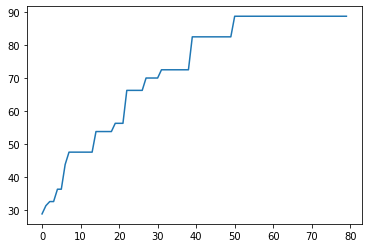

In [11]:
data_train = np.copy(encode(df))
ukpop = 30
gen = 30
pc = 0.7
pm = 0.1
generasi = 80
old_gen = generate_populasi(ukpop, gen) 
fit_plot = []
for i in range(generasi) :
    mutant = mutasi(old_gen,pc,pm,data_train)
    new_gen = np.copy(replace(old_gen,mutant,data_train))
    old_gen = np.copy(new_gen)
    print(max(fitness(new_gen,data_train)), end = " ")
    fit_plot.append(max(fitness(new_gen,data_train)))
plt.plot(fit_plot)
individu_hasil = max_fitness(new_gen,data_train)
print("Akurasi : ", max(fitness(new_gen,data_train)),"%")
print("Rules : ",individu_hasil)
plt.show()

In [12]:
dtest = pd.read_csv("data_uji_opsi_1.csv", names = ["Suhu", "Waktu", "Cuaca", "Hujan"])
dtest.head()

,Suhu,Waktu,Cuaca,Hujan
0,Tinggi,Siang,Berawan,Rendah
1,Rendah,Siang,Hujan,Tinggi
2,Normal,Pagi,Hujan,Tinggi
3,Tinggi,Siang,Hujan,Normal
4,Rendah,Malam,Hujan,Rendah


In [13]:
datas0 = []
for i in dtest.index :
    temp0 = []
    if (dtest.Suhu[i] == "Rendah") :
        temp0.append(1)
        temp0.append(0)
        temp0.append(0)
    if (dtest.Suhu[i] == "Normal") :
        temp0.append(0)
        temp0.append(1)
        temp0.append(0)
    if (dtest.Suhu[i] == "Tinggi") :
        temp0.append(0)
        temp0.append(0)
        temp0.append(1)
    if (dtest.Waktu[i] == "Pagi") :
        temp0.append(1)
        temp0.append(0)
        temp0.append(0)
        temp0.append(0)
    if (dtest.Waktu[i] == "Siang") :
        temp0.append(0)
        temp0.append(1)
        temp0.append(0)
        temp0.append(0)
    if (dtest.Waktu[i] == "Sore") :
        temp0.append(0)
        temp0.append(0)
        temp0.append(1)
        temp0.append(0)
    if (dtest.Waktu[i] == "Malam") :
        temp0.append(0)
        temp0.append(0)
        temp0.append(0)
        temp0.append(1)
    if (dtest.Cuaca[i] == "Cerah") :
        temp0.append(1)
        temp0.append(0)
        temp0.append(0)
        temp0.append(0)
    if (dtest.Cuaca[i] == "Berawan") :
        temp0.append(0)
        temp0.append(1)
        temp0.append(0)
        temp0.append(0)
    if (dtest.Cuaca[i] == "Rintik") :
        temp0.append(0)
        temp0.append(0)
        temp0.append(1)
        temp0.append(0)
    if (dtest.Cuaca[i] == "Hujan") :
        temp0.append(0)
        temp0.append(0)
        temp0.append(0)
        temp0.append(1)
    if (dtest.Hujan[i] == "Rendah") :
        temp0.append(1)
        temp0.append(0)
        temp0.append(0)
    if (dtest.Hujan[i] == "Normal") :
        temp0.append(0)
        temp0.append(1)
        temp0.append(0)
    if (dtest.Hujan[i] == "Tinggi") :
        temp0.append(0)
        temp0.append(0)
        temp0.append(1)

    datas0.append(temp0)

In [14]:
def testing(rule, dtest) :
    hasil = []
    for i in range(len(dtest)) :
        indv_test = np.copy(dtest[i])
        suhu = False
        waktu = False
        cuaca = False
        hujan = False
        has = False
        rule1 = False        
        
        suhu = ((rule[0] and indv_test[0]) or (rule[1] and indv_test[1]) or (rule[2] and indv_test[2]))
        waktu = ((rule[3] and indv_test[3]) or (rule[4] and indv_test[4]) or (rule[5] and indv_test[5]) or (rule[6] and indv_test[6]))
        cuaca = ((rule[7] and indv_test[7]) or (rule[8] and indv_test[8]) or (rule[9] and indv_test[9]) or (rule[10] and indv_test[10]))
        hujan = ((rule[10] and indv_test[10]) or (rule[12] and indv_test[12]) or (rule[13] and indv_test[13]))
        has = suhu and waktu and cuaca and hujan
        rule1 = has
        
        suhu2 = False
        waktu2 = False
        cuaca2 = False
        hujan2 = False
        has2 = False
        rule2 = False
        
        suhu2 = ((rule[15] and indv_test[0]) or (rule[16] and indv_test[1]) or (rule[17] and indv_test[2]))
        waktu2 = ((rule[18] and indv_test[3]) or (rule[19] and indv_test[4]) or (rule[20] and indv_test[5]) or (rule[21] and indv_test[6]))
        cuaca2 = ((rule[22] and indv_test[7]) or (rule[23] and indv_test[8]) or (rule[24] and indv_test[9]) or (rule[25] and indv_test[10]))
        hujan2 = ((rule[26] and indv_test[11]) or (rule[27] and indv_test[12]) or (rule[28] and indv_test[13]))
        has2 = suhu2 and waktu2 and cuaca2 and hujan2
        rule2 = has2
        
        if (rule1 == True) :
            hasil.append(rule[14])
        elif (rule2 == True) :
            hasil.append(rule[29])
        elif (rule1 == False and rule2 == False) :
            if (rule[14] == 0) :
                hasil.append(1)
            else :
                hasil.append(0)
        
    return hasil

In [15]:
rule = individu_hasil
print(rule)
Hasil = []
for i in range(len(datas0)) :
    if (testing(rule,datas0)[i] == 1) :
        Hasil.append("Ya")
        print('Ya')
    else :
        Hasil.append("Tidak")
        print('Tidak')
        

[1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Ya
Tidak
Tidak
Tidak
Tidak
Tidak
Ya
Ya
Ya
Tidak
Tidak
Tidak
Tidak
Tidak
Tidak
Tidak
Ya
Tidak
Ya
Tidak


In [17]:
import csv
with open('data_target_opsi_1.csv', 'w', newline='') as csvFile:
    writer = csv.writer(csvFile, delimiter=',', lineterminator='\n')
    for i in range(len(Hasil)) :
        myList = []
        myList.append(Hasil[i])
        writer.writerow(myList)
csvFile.close()